In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
wendy_data_directory = '/users/Wendy/Capstone/saudi_arabia_112019_tweets_csv_hashed_1.csv'
gefei_data_directory = '/Users/Sylvia/Desktop/1006/saudi_arabia_112019_tweets_csv_hashed/saudi_arabia_112019_tweets_csv_hashed_1.csv'
tweets = pd.read_csv(wendy_data_directory)

/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_33963/4039367489.py:3: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(wendy_data_directory)


In [4]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
tweets.head(10)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_userid,in_reply_to_tweetid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
0,1137497501194493952,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,PNn2yIomi1HIYwGdduEWQb+Jj4lX5NIHaMQmHrK6Y=,المملكة العربية السعودية,أقبل المقدم 💫الريتويت مراقب👀,NaN,3974,5092,2019-02-14,ar,ar,RT @3v5v3: ٢_ 🔴 عسل سدر 🍯 🍯\n\n ❌ ❌ فوائد عسل السدر ❌ ❌\n\n [ للالتهابات ✔\n\n [ الرئوية ✔\n \n[ وأمراض ✔\n\n [ الجهاز التنفسي…,2019-06-08 23:11,Twitter for iPhone,NaN,NaN,NaN,True,NaN,1.137208e+18,absent,absent,0.0,0.0,0.0,0.0,[],[],['915662559264542720']
1,1170605961829990400,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,ar,(للرجال نصيب مما ترك الوالدان والأقربون وللنساء نصيب مما ترك الوالدان والأقربون مما قل منه أو كثر نصيبا مفروضا) [النساء:7] https://t.co/QuOqJLHVkO,2019-09-08 07:53,quran twit,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,1.0,0.0,[],['https://qurantwit.com/tw'],[]
2,1172783625445597184,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,ar,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان يريد حرث الدنيا نؤته منها وما له في الآخرة من نصيب) [الشورى:20] https://https://t.co/QuOqJLHVkO,2019-09-14 08:06,quran twit,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,2.0,1.0,[],['https://qurantwit.com/tw'],[]
3,1122861301556969478,245029386,🦋 الًٓــٌٓريــٓـم 🦋,reem78_alfla,Kuwait,Queen of April🦋 instagram : reem_alfla4 snapchat : reem78L تويتر الاحتياطي : reem78alfla,NaN,13141,187,2011-01-30,en,ar,دائما يمثلني @kingoflaw69 👏🏻👏🏻 #البدون #اسقاط_القروض_لليوم_145 https://t.co/BOVN83MXi0,2019-04-29 13:52,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,9.0,73.0,74.0,"['البدون', 'اسقاط_القروض_لليوم_145']",[],['382706391']
4,1107401207025410049,245029386,🦋 الًٓــٌٓريــٓـم 🦋,reem78_alfla,Kuwait,Queen of April🦋 instagram : reem_alfla4 snapchat : reem78L تويتر الاحتياطي : reem78alfla,NaN,13141,187,2011-01-30,en,und,#اسقاط_القروض_لليوم_103,2019-03-17 21:59,Twitter for iPhone,NaN,NaN,1.107400e+18,False,NaN,NaN,absent,absent,0.0,0.0,1.0,3.0,['اسقاط_القروض_لليوم_103'],[],[]
5,1174386089659965440,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,الحمدالله وأخيراً ضبط الحظ 😍 https://t.co/L9JSLtuFLL,2019-09-18 18:13,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,3.0,0.0,0.0,[],[],[]
6,1107018391850807296,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,سويت كل شي ياماتيتش 💔,2019-03-16 20:38,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,1.0,0.0,0.0,[],[],[]
7,1115299968733143040,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,جوفينكو وش قاعد يسوي!!,2019-04-08 17:06,Twitter for iPhone,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[],[]
8,1143516030297395201,1121701880,ấłřấŝŝễễħ_48🕊ḁѦ,suuny2010,Najran🕊 Riyadh🕊🇸🇦lbri🇴🇲,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏يٌّاٍّرًّبّْ اٍّاٍّرًّحّْمّـُ اٍّمّـُيٌّ وّاٍّاٍّغٌّفّْرًّلَّهّْاٍّاٍّ💔انَثَئ مَعَلَقَهَ بَجَدَاائلَ االَسَمَاء🕊,NaN,9078,2127,2013-01-26,ar,und,#اكتب_بيت_شعر_تحبه\n💜aA https://t.co/CGHrMZmM0M,2019-06-25 13:47,Twitter for Android,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,1.0,3.0,4.0,['اكتب_بيت_شعر_تحبه'],[],[]
9,1180891970622885889,358533297,نواف.,Nawaf_UTD7,Khobar,@OnSideAr,NaN,6066,903,2011-08-20,en,ar,مدرب لل

Most frequently used hashtags

## EDA

In [6]:
tweets_full = []
for i in tqdm(range(1, 5)):
  directory = '/users/Wendy/Capstone/saudi_arabia_112019_tweets_csv_hashed_{}.csv'.format(i)
  tweets_full.append(pd.read_csv(directory))

tweets_full = pd.concat(tweets_full, ignore_index=True)

  0%|          | 0/4 [00:00<?, ?it/s]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_33963/2702202783.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 25%|██▌       | 1/4 [01:11<03:35, 71.95s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_33963/2702202783.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 50%|█████     | 2/4 [02:27<02:28, 74.26s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_33963/2702202783.py:4: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_full.append(pd.read_csv(directory))
 75%|███████▌  | 3/4 [03:11<01:00, 60.28s/it]/var/folders/5t/drh_ys0122sf_3q7npyxb3mh0000gn/T/ipykernel_33963/2702202783.py:4: DtypeWarning: Columns (15,19) have mixed types. Speci

Proportion of retweet

In [8]:
N = len(tweets_full)

# retweet count
retweet_count = len(tweets_full[tweets_full['is_retweet']==True])
print('% retweet: {}'.format(np.round(retweet_count / N, 4)))

% retweet: 0.4896


Proportion contains mention

In [57]:
import ast
tweets_full['if_mention'] = (tweets_full['user_mentions'] != '[]')
#tweets_full['tweet_text'].str.contains(r'@\w+')
mention_count =  len(tweets_full[(tweets_full['is_retweet'] == False) & (tweets_full['if_mention']==True)])
n = len(tweets_full[tweets_full['is_retweet'] == False])
print('% original tweets contain mentions: {}'.format(np.round(mention_count / n, 4)))


% original tweets contain mentions: 0.3023


Most frequently mentioned user

In [64]:
import ast
from collections import Counter
mentions = tweets_full[tweets_full['if_mention'] == True]['user_mentions']

counter = Counter()

for mention in mentions:
    mention_list = ast.literal_eval(mention)
    counter.update(mention_list)


top_10_mention = counter.most_common(10)
for user_id, count in top_10_mention:
    print("{} was mentioned {} times".format(user_id, count))


: 

Proportion contains link

In [12]:
tweets_full['if_link'] = tweets_full['tweet_text'].str.contains(r'http\S+')
link_count =  len(tweets_full[(tweets_full['is_retweet'] == False) & (tweets_full['if_link']==True)])
n = len(tweets_full[tweets_full['is_retweet'] == False])
print('% original tweets contain links: {}'.format(np.round(link_count / n, 4)))

% original tweets contain links: 0.5244


Trend of account creation over month

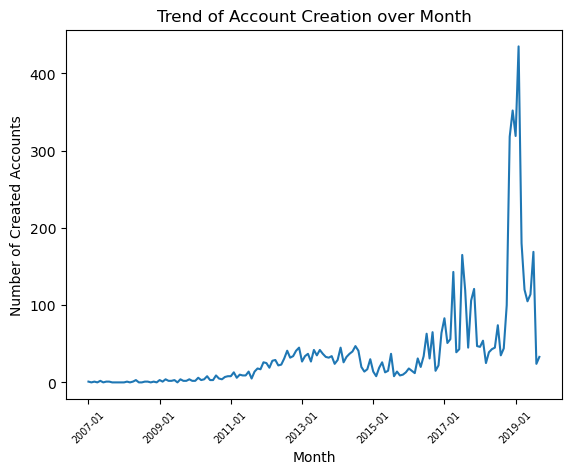

In [14]:
# account creation date
tweets_full['account_creation_date'] = pd.to_datetime(tweets_full['account_creation_date'])
tweets_full['account_creation_month'] = tweets_full['account_creation_date'].dt.strftime('%Y-%m')
min_date = min(tweets_full['account_creation_date']).strftime('%Y-%m')
max_date = max(tweets_full['account_creation_date']).strftime('%Y-%m')
all_months = pd.date_range(start=min_date, end=max_date, freq='M').strftime('%Y-%m')

creation_count = tweets_full.groupby('account_creation_month')['userid'].nunique()
creation_count = creation_count.reindex(all_months, fill_value=0)
plt.plot(creation_count)
plt.xticks(['2007-01', '2009-01', '2011-01', '2013-01', '2015-01', '2017-01', '2019-01'], rotation=45, size=7)
plt.xlabel('Month')
plt.ylabel('Number of Created Accounts')
plt.title('Trend of Account Creation over Month')
plt.show()


Tweet Languages

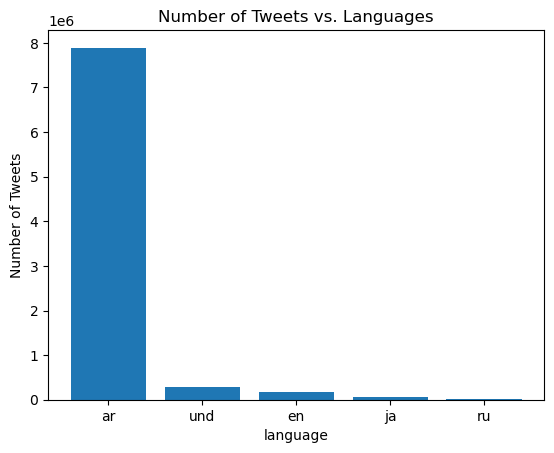

,tweet_language,count,%
0,ar,7890486,0.9332
44,und,274276,0.0324
10,en,184019,0.0218
24,ja,53268,0.0063
34,ru,18224,0.0022
41,tr,16476,0.0019
32,pt,3838,0.0005
20,in,3793,0.0004
14,fa,2361,0.0003
11,es,1245,0.0001


In [15]:
language_count = tweets_full[tweets_full['is_retweet']==False].groupby('tweet_language').size().reset_index()
language_count.columns = ['tweet_language', 'count']
language_count = language_count.sort_values(by='count', ascending=False)
top_5_languages = language_count.head(5)
plt.bar(top_5_languages['tweet_language'], top_5_languages['count'])
plt.xlabel('language')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets vs. Languages')
plt.show()

language_count['%'] = np.round(language_count['count'] / n, 4)
language_count.head(10)

## Text Cleaning

### Remove tags and links

In [21]:
import re

def remove_tags_and_links(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    return text

tweets['cleaned_text'] = tweets['tweet_text'].apply(remove_tags_and_links)

### Remove RT: @user_id for Retweet

In [6]:
## TODO

## Try-outs with Simple Sentences

In [22]:
english_sentences = set([
        "The quick brown fox jumps over the lazy dog.",
        "Tomorrow is another day.",
        "The sun rises in the east.",
        "Life is beautiful.",
        "Birds sing in the morning.",
        "The world is round.",
        "Time flies when you're having fun.",
        "All that glitters is not gold.",
        "Actions speak louder than words.",
        "Love conquers all.",
        "Knowledge is power.",
        "Beauty is in the eye of the beholder.",
        "Where there's smoke, there's fire.",
        "Rome wasn't built in a day.",
        "Money can't buy happiness.",
        "Laughter is the best medicine.",
        "Two heads are better than one.",
        "An apple a day keeps the doctor away.",
        "Hindsight is 20/20.",
        "The early bird catches the worm.",
        "Every cloud has a silver lining.",
        "A penny for your thoughts.",
        "A watched pot never boils.",
        "You can't judge a book by its cover.",
        "When in Rome, do as the Romans do.",
        "Fortune favors the bold.",
        "Where there is a will, there is a way.",
        "Practice makes perfect.",
        "Don't cry over spilled milk.",
        "The grass is always greener on the other side.",
        "There's no place like home.",
        "When the cat's away, the mice will play.",
        "Necessity is the mother of invention.",
        "The more, the merrier.",
        "Better late than never.",
        "A friend in need is a friend indeed.",
        "A rolling stone gathers no moss.",
        "It's a piece of cake.",
        "The pot calling the kettle black.",
        "Don't count your chickens before they hatch.",
        "A picture is worth a thousand words.",
        "When one door closes, another one opens.",
        "Beggars can't be choosers.",
        "A stitch in time saves nine.",
        "The squeaky wheel gets the grease.",
        "Home is where the heart is.",
        "People who live in glass houses shouldn't throw stones.",
        "Silence is golden.",
        "There's no smoke without fire.",
        "The proof is in the pudding.",
        "Absence makes the heart grow fonder.",
    ])
english_sentences = list(english_sentences)

In [23]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

embeddings = model.encode(english_sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:5]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(english_sentences[i], english_sentences[j], pair['score']))
    print(i, j)

There's no smoke without fire. 		 Where there's smoke, there's fire. 		 Score: 0.8695
44 50
Home is where the heart is. 		 There's no place like home. 		 Score: 0.6953
27 45
Life is beautiful. 		 Beauty is in the eye of the beholder. 		 Score: 0.6411
31 41
Beggars can't be choosers. 		 Money can't buy happiness. 		 Score: 0.5800
2 16
Every cloud has a silver lining. 		 The grass is always greener on the other side. 		 Score: 0.5727
8 35


## Try-outs For paraphrase-multilingual-mpnet-base-v2

In [24]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

sample_tweets = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['tweet_text'][:500]

embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
top_pair = pd.DataFrame(columns=["Tweet 1", "Tweet 2", "Score"])
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
      if cosine_scores[i][j] < 0.9:
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)


for pair in pairs[0:20]:
    i, j = pair['index']
    top_pair = top_pair.append({"Tweet 1": list(sample_tweets)[i], "Tweet 2": list(sample_tweets)[j], "Score": pair['score']}, ignore_index=True)

top_pair

,Tweet 1,Tweet 2,Score
0,@Andy_destroyer1 Glad to have you in the kingdom of Saudi,"@Andy_destroyer1 @suerox On behalf of all Saudis, I want to welcome you guys in our country, you will love your stay here",tensor(0.8993)
1,@Andy_destroyer1 Enjoy your time in Saudi,"@Andy_destroyer1 Welcome to the Kingdom of Saudi dude , wish you great luck.",tensor(0.8989)
2,"@Andy_destroyer1 Andy, welcome to Saudi Arabia, you're the greatest ever.",@Andy_destroyer1 Welcome to Saudi Andy❤️🇸🇦,tensor(0.8987)
3,@Andy_destroyer1 Glad to have you in the kingdom of Saudi,@Andy_destroyer1 All Saudis are happy to have you here in Saudi Arabia. I know it will be one hell of a match.,tensor(0.8986)
4,The Best FIFA Football Awards 2019 - Marcelo. https://t.co/3W1kubKdfM,The Best FIFA Football Awards 2019 - Sergio Ramos. https://t.co/FDSJ2BpDFA,tensor(0.8986)
5,"@Andy_destroyer1 Welcome to the Kingdom of Saudi dude , wish you great luck.",@Andy_destroyer1 Welcome to Saudi Champ and have a great one.,tensor(0.8982)
6,"@Andy_destroyer1 Welcome to the Kingdom of Saudi dude , wish you great luck.",@Andy_destroyer1 @suerox Welcome to Saudi Arabia🇸🇦,tensor(0.8980)
7,@Andy_destroyer1 Great to have you in Saudi Arabia man.,"@Andy_destroyer1 Welcome to Saudi, champ",tensor(0.8973)
8,@kbsalsaud Houthis made by Iran to use them against their enemies.,@kbsalsaud Houthis are been used by Iran to implement terrorist operations on behalf of them.,tensor(0.8971)
9,@Andy_destroyer1 Welcome 🙏,@Andy_destroyer1 I hope you enjoy this visit\nWelcome ❤️🥳,tensor(0.8966)


In [ ]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

sample_tweets = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['cleaned_text'][:500]

embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
top_pair = pd.DataFrame(columns=["Tweet 1", "Tweet 2", "Score"])
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
      if cosine_scores[i][j] < 0.9:
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)


for pair in pairs[0:10]:
    i, j = pair['index']
    top_pair = top_pair.append({"Tweet 1": list(sample_tweets)[i], "Tweet 2": list(sample_tweets)[j], "Score": pair['score']}, ignore_index=True)

top_pair

In [12]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
start_time = time.time()
sample_tweets = tweets[:5000]['cleaned_text']
embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("MiniLM Embedding Time for 5000 Tweets: {}".format(end_time-start_time))

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
start_time = time.time()
sample_tweets = tweets[0:5000]['cleaned_text']
embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("mpnet Embedding Time for 5000 Tweets: {}".format(end_time-start_time))


MiniLM Embedding Time for 5000 Tweets: 175.28546571731567
mpnet Embedding Time for 5000 Tweets: 585.9684109687805


## Try-on with faiss

__Problems with faiss: paraphrase-multilingual-MiniLM and paraphrase-multilingual-mpnet models have been designed with an exclusive focus on cosine similarity checks.__

In [25]:
import faiss

### Generating data

In [26]:
dimension = 128    # dimensions of each vector
n = 200    # number of vectors
np.random.seed(1)
db_vectors = np.random.random((n, dimension)).astype('float32')

In [27]:
nlist = 5  # number of clusters
quantiser = faiss.IndexFlatL2(dimension)  # flat indexing
index = faiss.IndexIVFFlat(quantiser, dimension, nlist, faiss.METRIC_L2)

__Need to try different indexing methods on our data:__  
IndexFlatL2: Performs exact L2 (Euclidean) distance search, 
IndexFlatIP: Performs exact inner product (cosine similarity) search., IndexFlat: Generic flat index that supports L2 or inner product search.  
IndexIVFFlat: Uses an inverted file for indexing. It's efficient for large-scale datasets and supports both L2 and inner product search.
IndexIVFPQ: Combines inverted files with product quantization (PQ) for improved memory efficiency and speed in high-dimensional spaces.  
 and etc.

In [28]:
print(index.is_trained)   # False
index.train(db_vectors)  # train on the database vectors
print(index.ntotal)   # 0
index.add(db_vectors)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)   # 200

False
0
True
200


In [29]:
nprobe = 2  # find 2 most similar clusters
n_query = 10
k = 3  # return 3 nearest neighbours
np.random.seed(0)
query_vectors = np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(query_vectors, k)


The search operation will return the ids (row numbers or index in the vector store) of the k most similar vectors for each query vector along with their respective distances.



In [30]:
distances, indices

(array([[15.770457 , 16.773014 , 17.17131  ],
        [16.476107 , 18.52229  , 18.811914 ],
        [15.520994 , 16.500257 , 17.069542 ],
        [16.842716 , 17.712343 , 17.828487 ],
        [18.325392 , 18.495464 , 18.684458 ],
        [17.531883 , 18.18179  , 18.331264 ],
        [16.840158 , 17.03664  , 17.091755 ],
        [15.9840355, 16.380917 , 17.270592 ],
        [18.018501 , 18.0761   , 18.766172 ],
        [17.11392  , 17.385284 , 17.65757  ]], dtype=float32),
 array([[185,  35,  96],
        [118,  51, 122],
        [148, 149, 173],
        [175, 177,  50],
        [ 44, 144, 174],
        [156,  74, 151],
        [ 57, 144,  18],
        [ 82,  12,  46],
        [ 52,  73,  59],
        [ 82,  46,  90]]))

## Try-on with our data （english only）

In [33]:
sample_tweets_engligh = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['cleaned_text'][:500]
sample_tweets_engligh=sample_tweets_engligh.tolist()
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
start_time = time.time()
#sample_tweets = tweets[:5000]['cleaned_text']
embeddings = model.encode(list(sample_tweets_engligh), convert_to_tensor=True)
end_time = time.time()
print("MiniLM Embedding Time for 5000 Tweets: {}".format(end_time-start_time))



MiniLM Embedding Time for 5000 Tweets: 12.645446062088013


In [34]:
embeddings.shape

torch.Size([500, 384])

In [35]:
embed_dimension = embeddings.shape[1]
nlist = 10  # number of clusters
quantiser = faiss.IndexFlatL2(embed_dimension)  # flat indexing
index = faiss.IndexIVFFlat(quantiser, embed_dimension, nlist, faiss.METRIC_L2)

TODO: how to define the number of cluters?

In [36]:
print(index.is_trained)   # False
index.train(embeddings)  # train on the database vectors
print(index.ntotal)   # 0
index.add(embeddings)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)

False
0
True
500


In [37]:
nprobe = 2  # find 2 most similar clusters
k = 2  # return 3 nearest neighbours

distances, indices = index.search(embeddings, k)


In [40]:
similar_tweets = []
for i, j in indices: similar_tweets.append([[sample_tweets_engligh[i]],[sample_tweets_engligh[j]]])

In [55]:
simiar_check = pd.DataFrame(similar_tweets)
simiar_check['distance'] = distances[:,1]
simiar_check[simiar_check['distance']>2].sort_values(by='distance')

#simiar_check.sort_values(by='distance')

,0,1,distance
177,[ Welcome 🙏],[ welcome],2.790570
263,[ Thank you for this beautiful day],[ Thank you for this beautiful day 🎧],2.885654
150,[ Thank you for this beautiful day 🎧],[ Thank you for this beautiful day],2.885654
19,[Ander 💔💔 ],[n i n e♥️],3.691048
433,[n i n e♥️],[Ander 💔💔 ],3.691048
...,...,...,...
38,[My favorite car#girlsnight ],[ Great Night 🔥🔥🔥🔥🔥😍],31.434664
101,[goddess ],[ beautiful thing],31.659117
7,[#تتزوج_جنوبيه_ولا_مغربيه\n💜aA\nMusic Atlas of Morocco ],"[ I would love to remember all the amazing things our beloved country is doing for us. Education, safety, development and being together is what's Saudi Arabia about 🇸🇦💚🙏🏼]",33.646252
458,[ GTA San Andreas],"[ In the day of the fight, I will be there watching from the first row. I can't miss this unbelievable fight.]",34.454895


**TODO: Question: how to evaluate index?**

### With 5000 data

In [56]:
model_MiniLM = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
start_time = time.time()
sample_tweets = tweets[:5000]['cleaned_text']
embeddings_MiniLM = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("MiniLM Embedding Time for 5000 Tweets: {}".format(end_time-start_time))

MiniLM Embedding Time for 5000 Tweets: 171.53337216377258


In [57]:
embeddings.shape

torch.Size([500, 384])

flat indes work fine with vectors with low dimensions. Will have problem if vectors has high dimensions.
__Using Product Quantization for compression for faster search results.__

In [58]:
embed_dimension = embeddings.shape[1]
nlist = 10  # number of clusters
quantiser = faiss.IndexFlatL2(embed_dimension)  # flat indexing
index = faiss.IndexIVFFlat(quantiser, embed_dimension, nlist, faiss.METRIC_L2)

In [59]:

index.train(embeddings)  # train on the database vectors

index.add(embeddings)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)

True
500


In [60]:
nprobe = 2  # find 2 most similar clusters
k = 2  # return 2 nearest neighbours

distances, indices = index.search(embeddings, k)

In [61]:
distances, indices

(array([[ 0.        , 21.548117  ],
        [ 0.        , 18.38847   ],
        [ 0.        , 15.432641  ],
        [ 0.        , 19.825525  ],
        [ 0.        , 15.696806  ],
        [ 0.        , 11.368223  ],
        [ 0.        , 25.416546  ],
        [ 0.        , 33.64625   ],
        [ 0.        , 23.56989   ],
        [ 0.        , 13.408457  ],
        [ 0.        , 19.984848  ],
        [ 0.        , 18.032219  ],
        [ 0.        ,  4.632502  ],
        [ 0.        , 18.67744   ],
        [ 0.        , 13.13461   ],
        [ 0.        , 16.656876  ],
        [ 0.        , 13.13461   ],
        [ 0.        , 22.775066  ],
        [ 0.        , 23.858704  ],
        [ 0.        ,  3.6910477 ],
        [ 0.        , 13.71945   ],
        [ 0.        , 15.546641  ],
        [ 0.        , 17.5197    ],
        [ 0.        , 19.560501  ],
        [ 0.        , 16.656876  ],
        [ 0.        , 17.458437  ],
        [ 0.        , 21.01353   ],
        [ 0.        , 21.213

In [64]:
similar_tweets = []
for i, j in indices: similar_tweets.append([[sample_tweets[i]],[sample_tweets[j]]])
simiar_check_5000 = pd.DataFrame(similar_tweets)
simiar_check_5000['distance'] = distances[:,1]
simiar_check_5000=simiar_check_5000.sort_values(by='distance')
simiar_check_5000[simiar_check_5000['distance']>0]

,0,1,distance
201,[(رب السماوات والأرض وما بينهما الرحمن لا يملكون منه خطابا) [النبإ:37] ],"[#هناا_الوحي\n#عدناا_من_الجنه\n✋\nمن نجد العذيه💕\nسلام للرعيه من بعد ""العالم الثالث""!\n\n😢💔\nأن تصل متأخرا خيرا من أن لا تصل😶\n🚶\n كل عام وانتم بألف خير وسعادة\nحبايب ""وحي😹 أخواني وأخواتي\nمتابعي الأعزاااااء😍❤\nوالمزز العسولات وجميع\nالتماسيح 😘\n#ماذا_تحتاجون_بهذه_اللحظه \n#وحي_الخيال ]",0.194632
106,[(ختامه مسك وفي ذلك فليتنافس المتنافسون) [المطففين:26] ],[😂😂 ],0.380522
112,[😂😂 ],[(ختامه مسك وفي ذلك فليتنافس المتنافسون) [المطففين:26] ],0.380522
100,[Vacations are chaos monkey for the organization. Minimum vacation policies build sustainable &amp; fault-tolerant teams.],[(ختامه مسك وفي ذلك فليتنافس المتنافسون) [المطففين:26] ],0.471250
163,[احد فهم شي !! .. عربي ي غثييث \nوتلومووني يوم اقول يقفل حساابه\n😂😂😂😂],[#هل_انت_مستعد_للقاء_الله\nياارب ااحسن خااتمتي],0.764252
...,...,...,...
38,[ربنا تقبل منا إنك أنت السميع العليم وتب علينا إنك أنت التواب الرحيم.],[اللهم أكرمنا بقرب لك لا نرتد بعده، وعتق يغشانا برحمة منك ويقينا عذابك ],31.434664
101,[يا واحد يا أحد يا صمد يامن لم يلد و لم يولد و لم يكن له كفوا أحد أنت تعلم ماقدمته إبتغاء وجهك فوفقني وأفتح لي أبواب رزقك أناوكل مسلم ومسلمة ],[اللهم صل وسلم على نبينا محمد ],31.659117
7,[جوفينكو وش قاعد يسوي!!],[جمهور #النصر بهذل جمهور واعلام الهلال الوضع كذا 👇بالضبط😎 #الهلال_يتعرض_للاذي_النفسي ],33.646252
458,[احرص على ان تجد اجابة كافية لسؤال : ماذا تعني انت عند امك ؟ \n #ماذا_تعني_لك_امك],[🌹 ],34.454895


__TODO: try different indexing methods__

What method does faiss indexing use for clustering?  
__Hierarchical Clustering on Quantized Vectors (HCQ)__  
1. Vector Quantization: Faiss first quantizes the vectors in your dataset into a codebook of centroids. This step reduces the dimensionality of the data and speeds up search operations.
2. Hierarchical Structure: HCQ builds a hierarchical structure by grouping these centroids into clusters recursively. It creates a tree-like structure where each node represents a cluster of centroids.
3. Search and Clustering: This hierarchical structure can be used to perform approximate nearest neighbor search with the advantage that you can trade off accuracy for speed by selecting different levels of the tree. It can also be used for clustering by selecting subsets of the tree or specific clusters at various levels.

__Difference between KNN and faiss:__
1. Faiss is specifically designed for efficient similarity search and indexing. Its primary purpose is to accelerate nearest neighbor search in high-dimensional spaces.
2. Faiss is highly optimized for efficient similarity search. It uses techniques like vector quantization and hierarchical structures to speed up nearest neighbor search in high-dimensional spaces.
3. Traditional KNN typically doesn't use indexing structures. It performs a brute-force search by computing distances for all data points.

## How to use faiss to do clustering?

__Using the tweets with only english for readability__

In [66]:
sample_tweets = tweets[(tweets['tweet_language'] == 'en') & (tweets['is_retweet']==False)]['cleaned_text'][:500]
sample_tweets=sample_tweets.tolist()
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
start_time = time.time()
#sample_tweets = tweets[:5000]['cleaned_text']
embeddings = model.encode(list(sample_tweets), convert_to_tensor=True)
end_time = time.time()
print("MiniLM Embedding Time for 5000 Tweets: {}".format(end_time-start_time))


MiniLM Embedding Time for 5000 Tweets: 8.991444826126099


In [67]:
embeddings_arr = np.array(embeddings)

TODO: visualize clusters (dimension reduction methods) interactive plots

In [68]:
import numpy as np
import faiss


num_tweets, embedding_dim = embeddings_arr.shape


# Normalize embeddings
faiss.normalize_L2(embeddings_arr)


num_clusters = 9 #TODO: find K

# Initialize k-means clustering index
kmeans = faiss.Kmeans(embedding_dim, num_clusters, niter=100, verbose=True)
# TODO: Other indexing method?
# Cannot adjust indexing method unless write a custom clustering algorithm

kmeans.train(embeddings_arr)

_, cluster_indices = kmeans.index.search(embeddings_arr, 1) # Assign each tweet to a cluster

# Create a dictionary for each cluster
cluster_to_tweets = {cluster_id: [] for cluster_id in range(num_clusters)}

# Get the tweet content
tweets = [ sample_tweets[i] for i in range(num_tweets) ]


for tweet_idx, cluster_id in enumerate(cluster_indices):
    cluster_to_tweets[cluster_id[0]].append(tweets[tweet_idx])

cluster_data = []
for cluster_id, tweets in cluster_to_tweets.items():
    for tweet in tweets:
        cluster_data.append([cluster_id, tweet])


clusters= pd.DataFrame(cluster_data, columns=["Cluster", "Tweet"])

clusters


Clustering 500 points in 384D to 9 clusters, redo 1 times, 100 iterations
  Preprocessing in 0.00 s


,Cluster,Tweet
0,0,My favorite car#girlsnight
1,0,wow twins omg!!!!!
2,0,beautiful thing
3,0,it’s beautiful
4,0,Eyes 👀
...,...,...
495,8,Try the Saudi food you will like it
496,8,Welcome to Jeddah 💚🇸🇦
497,8,"On behalf of all Saudis, I want to welcome you guys in our country, you will love your stay here"
498,8,you know buddy having you in saudi will make many people break routine and have a never before experience 😍😍
